# Task:
    Generate a signal of a same frequency as the input

# Imports

In [ ]:
import tqdm
import math
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset
from torch.utils.data import DataLoader



# Define Dataloader

In [ ]:
class FrequenciesDataset(Dataset):
    """
    f_list - list of frequencies
    """
    def __init__(self, t, fs, f_list):
        self.f_list = f_list
        self.t = t
        self.fs = fs

    def __len__(self):
        return len(self.f_list)

    def __getitem__(self, idx):
        f = self.f_list[idx]
        sample_size = int(self.t*self.fs)
        seq = torch.sin(2*math.pi*f*torch.linspace(1, self.t+1, sample_size))
        # Add feature dimnsion
        seq = seq[:, None]
        half_size = int(sample_size/2)
        x, y = torch.split(seq, (half_size, half_size))
        return x, y

# Define Model Classes

In [ ]:
class EncoderModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bidir):
        super(EncoderModel, self).__init__()
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        # Number of hidden layers
        self.layer_dim = layer_dim
        # GRU
        self.rnn = nn.GRU(input_dim, hidden_dim, layer_dim, batch_first=True,
                          bidirectional=bidir, dropout=0)

    def forward(self, x,hn):
        # First time step
        out, hn = self.rnn(x, hn)
        return hn

class DecoderModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bidir):
        super(DecoderModel, self).__init__()
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        # Number of hidden layers
        self.layer_dim = layer_dim
        # GRU
        self.rnn = nn.GRU(input_dim, hidden_dim, layer_dim, batch_first=True,
                          bidirectional=bidir, dropout=0)
        # Readout layer
        d = 1
        if bidir:
            d = 2
        self.fc = nn.Linear(hidden_dim*d, output_dim)

    def forward(self, x,hn):
        # First time step
        out, hn = self.rnn(x, hn)
        out = self.fc(out)
        return out, hn


# Prepare Dataloaders and data examination

Batch shape: torch.Size([128, 180, 1])


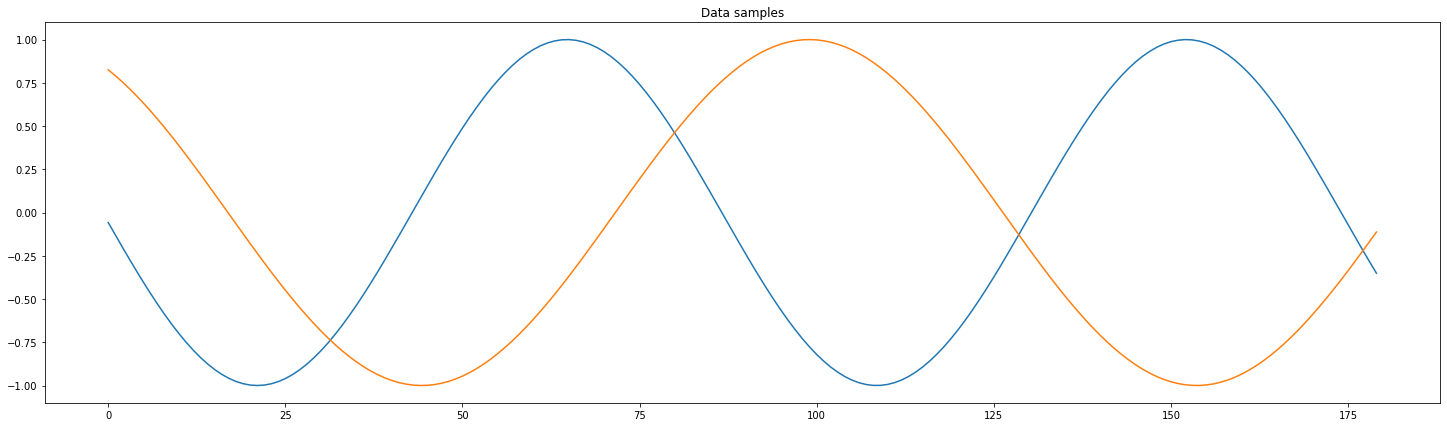

In [ ]:
# Set the seeds for reproducability
torch.manual_seed(1)
# Create dataset
BATCH_SIZE = 128
n_examples = 10000 # number of frequencies
T = 0.06 # Time period 0.06
Fs = 60e2 # Sampling rate 60e2
if (T*Fs) % 2 != 0:
    Fs += 1

# Frequencies in ranges 25 to 30 and 85 to 90 are test frequencies
fl = (torch.randperm(n_examples) + 1000)/100
train_mask = (fl<25) | ((fl>=30) & (fl<85)) | (fl>=90)
test_mask = [not el for el in train_mask]
train_fl = fl[train_mask]
test_fl = fl[test_mask]
train_data = FrequenciesDataset(T, Fs, train_fl) 
test_data = FrequenciesDataset(T, Fs, test_fl)
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE)
Y_train, X_train = next(iter(train_dataloader))
print(f"Batch shape: {X_train.shape}")
plt.rcParams["figure.figsize"] = (25,7)
plt.plot(X_train[0])
plt.plot(X_train[1])
plt.title('Data samples')
plt.show()

# Training and Test Loops

  1%|          | 1/100 [03:28<5:43:55, 208.44s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 90.03303527832031
Test Loss: 702.4522094726562


  2%|▏         | 2/100 [06:42<5:26:16, 199.77s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 85.91028594970703
Test Loss: 677.557373046875


  3%|▎         | 3/100 [09:02<4:38:54, 172.52s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 77.46936798095703
Test Loss: 626.6265869140625


  4%|▍         | 4/100 [11:21<4:14:58, 159.35s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 76.29013061523438
Test Loss: 622.9077758789062


  5%|▌         | 5/100 [13:41<4:01:21, 152.43s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 76.88578033447266
Test Loss: 622.7794799804688


  6%|▌         | 6/100 [16:02<3:52:35, 148.47s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 75.51109313964844
Test Loss: 602.1676025390625


  7%|▋         | 7/100 [18:21<3:45:32, 145.51s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 73.78553009033203
Test Loss: 608.473388671875


  8%|▊         | 8/100 [20:40<3:39:44, 143.31s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 72.11772918701172
Test Loss: 613.9237060546875


  9%|▉         | 9/100 [22:58<3:34:46, 141.61s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 67.0825424194336
Test Loss: 609.3433837890625


 10%|█         | 10/100 [25:16<3:30:55, 140.61s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 63.107757568359375
Test Loss: 574.6202392578125


 11%|█         | 11/100 [27:34<3:27:12, 139.69s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 56.30794906616211
Test Loss: 501.4736328125


 12%|█▏        | 12/100 [29:52<3:24:21, 139.33s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 46.86586380004883
Test Loss: 406.4264831542969


 13%|█▎        | 13/100 [32:10<3:21:23, 138.89s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 26.329299926757812
Test Loss: 115.7491226196289


 14%|█▍        | 14/100 [34:28<3:18:44, 138.65s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 10.874513626098633
Test Loss: 61.57991027832031


 15%|█▌        | 15/100 [36:47<3:16:24, 138.64s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 6.2743425369262695
Test Loss: 30.384443283081055


 16%|█▌        | 16/100 [39:05<3:13:56, 138.53s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 2.6768109798431396
Test Loss: 18.750953674316406


 17%|█▋        | 17/100 [41:23<3:11:15, 138.26s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 2.3834447860717773
Test Loss: 14.505805015563965


 19%|█▉        | 19/100 [46:00<3:07:02, 138.55s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 1.1349953413009644
Test Loss: 9.777091026306152


 20%|██        | 20/100 [48:19<3:04:55, 138.69s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 0.8972352147102356
Test Loss: 9.30810260772705


 21%|██        | 21/100 [50:38<3:02:53, 138.90s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 0.8112239837646484
Test Loss: 7.857997417449951


 22%|██▏       | 22/100 [52:57<3:00:34, 138.90s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 0.7157703638076782
Test Loss: 8.07726001739502


 23%|██▎       | 23/100 [55:15<2:57:48, 138.56s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 0.7427668571472168
Test Loss: 6.550746917724609


 24%|██▍       | 24/100 [57:35<2:56:00, 138.96s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 0.8169559836387634
Test Loss: 4.878071308135986


 25%|██▌       | 25/100 [59:54<2:53:44, 138.99s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 0.46502307057380676
Test Loss: 4.200308322906494


 26%|██▌       | 26/100 [1:02:13<2:51:13, 138.84s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 0.4313790798187256
Test Loss: 3.829110860824585


 27%|██▋       | 27/100 [1:04:30<2:48:35, 138.56s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 0.4588577151298523
Test Loss: 4.060491561889648


 28%|██▊       | 28/100 [1:06:49<2:46:20, 138.62s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 0.3595360815525055
Test Loss: 3.3144850730895996


 29%|██▉       | 29/100 [1:09:10<2:44:42, 139.20s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 0.373392790555954
Test Loss: 3.024970293045044


 30%|███       | 30/100 [1:11:30<2:42:45, 139.50s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 0.3944641649723053
Test Loss: 3.5840489864349365


 30%|███       | 30/100 [1:13:49<2:52:16, 147.67s/it]

torch.Size([896, 180, 1])
Decoder Learning Rate: 0.0002
Train Loss: 0.3373081088066101
Test Loss: 2.435159683227539
Early stopping!
Y shape: torch.Size([896, 180, 1])
Predictions shape: torch.Size([896, 180, 1])


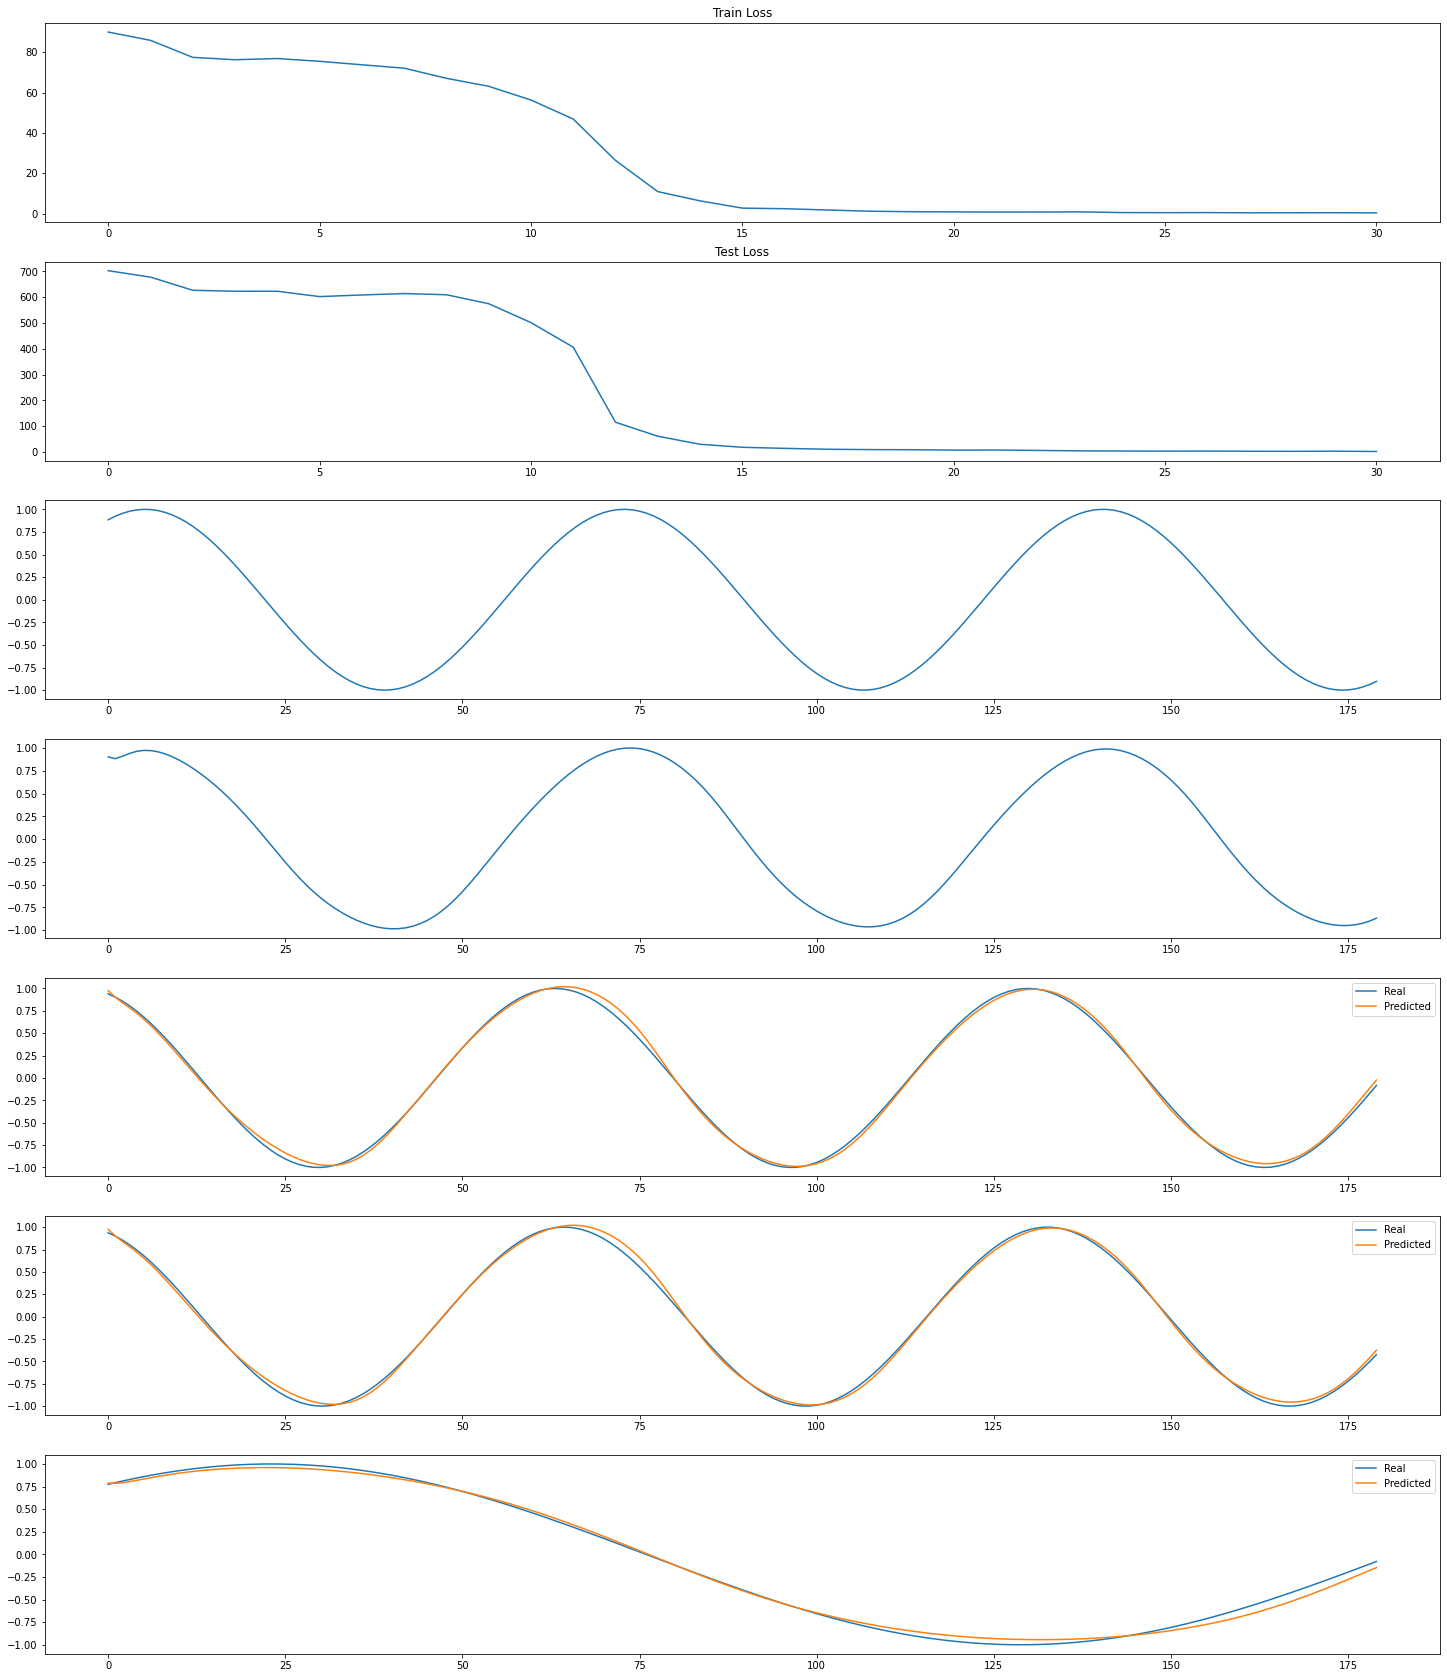

In [ ]:
EPOCHS = 100
LR = 0.0002
HIDDEN_SIZE = 60
INPUT_SIZE = 1
OUTPUT_SIZE = 1
NUM_LAYERS = 6
D = 1
BIDIRECTIONAL = False
TEACHER_FORCING = False
if BIDIRECTIONAL:
    D = 2
loss_list = []
test_loss_list = [] 
loss_fn = nn.MSELoss()
encoder = EncoderModel(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE,
                       BIDIRECTIONAL)
decoder = DecoderModel(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE,
                       BIDIRECTIONAL)
encoder_optimizer = torch.optim.Adam(encoder.parameters(), lr=LR,
                                     betas=(0.96, 0.999))
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=LR,
                                     betas=(0.96, 0.999))
encoder_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=encoder_optimizer)
decoder_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=decoder_optimizer)
    
    
def eval_test(test_dataloader, encoder, decoder, D):
    test_loss = 0
    with torch.no_grad():
        encoder.eval()
        decoder.eval()
        X_tmp, Y_tmp = next(iter(test_dataloader))
        predictions = torch.zeros((0, Y_tmp.size(1), 1))
        y_test = torch.zeros((0, Y_tmp.size(1), 1))
        for X, Y in test_dataloader:
            outputs = torch.zeros((BATCH_SIZE, 0, 1))
            # Initialize hidden state with zeros
            encoder_state = torch.zeros(D*NUM_LAYERS, X.size(0), HIDDEN_SIZE)
            for ei in range(0, X.size(1)):
                encoder_state = encoder(X[:, ei, None], encoder_state)
            decoder_input = torch.tensor(X[:, -1, None])
            decoder_state = encoder_state
            for di in range(0, Y.size(1)):
                decoder_input, decoder_state = decoder(decoder_input,
                                                       decoder_state)
                test_loss += loss_fn(decoder_input, Y[:, di, None])
                if decoder_input.size(0) == BATCH_SIZE:
                    outputs = torch.cat((outputs, decoder_input), axis=1)
            if outputs.size(1) != 0:
                y_test = torch.cat((y_test, Y), axis=0)
                predictions = torch.cat((predictions, outputs), axis=0)
        print(predictions.shape)
        return y_test, predictions, test_loss


def train(epochs, train_dataloader, test_dataloader, teacher_forcing, 
          encoder_optimizer, decoder_optimizer, encoder, decoder):
    t = tqdm.trange(EPOCHS)
    for epoch in t:
        encoder.train()
        decoder.train()
        for x_train, y_train in train_dataloader:
            # Zero gradients
            encoder_optimizer.zero_grad()
            decoder_optimizer.zero_grad()
            loss = 0
            test_loss = 0
            # Initialize hidden state with zeros
            encoder_state = torch.zeros(D*NUM_LAYERS, x_train.size(0),
                                        HIDDEN_SIZE)
            for ei in range(0, x_train.size(1)):
                encoder_state = encoder(x_train[:, ei, None], encoder_state)
            decoder_input = x_train[:, -1, None]
            decoder_state = encoder_state
            for di in range(0, y_train.size(1)):
                decoder_out, decoder_state = decoder(decoder_input,
                                                     decoder_state)
                loss += loss_fn(decoder_out, y_train[:,di, None])
                if teacher_forcing:
                    decoder_input = y_train[:,di, None]
                else:
                    decoder_input = decoder_out
            loss.backward()
            encoder_optimizer.step()
            decoder_optimizer.step()
        # The Learning Rate Decay once per epoch
        encoder_scheduler.step(loss)
        decoder_scheduler.step(loss)
        # Add training lost to list once per epoch
        loss_list.append(loss.item())
        # Get the test loss            
        y_test, predictions, test_loss = eval_test(test_dataloader, encoder,
                                                   decoder, D)
        test_loss_list.append(test_loss)
        print(
            f"Decoder Learning Rate: {decoder_optimizer.param_groups[0]['lr']}")
        print(f"Train Loss: {loss}")
        print(f"Test Loss: {test_loss}")
        if test_loss < 3:
            print("Early stopping!")
            break
    return y_test, predictions, loss_list, test_loss_list

    
y_test, predictions, loss_list, test_loss_list = train(EPOCHS, train_dataloader,
                                                       test_dataloader, 
                                                       TEACHER_FORCING, 
                                                       encoder_optimizer,
                                                       decoder_optimizer, 
                                                       encoder, decoder)
print(f"Y shape: {y_test.shape}")
print(f"Predictions shape: {predictions.shape}")
# Test frequencies examples            
plt.rcParams["figure.figsize"] = (25,30)
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(7, 1)
ax0.plot(loss_list)
ax0.set_title('Train Loss')
ax1.plot(test_loss_list)
ax1.set_title('Test Loss')
ax2.plot(y_test[0])
ax3.plot(predictions[0])
ax4.plot(y_test[2])
ax4.plot(predictions[2])
ax4.legend(['Real', 'Predicted'])
ax5.plot(y_test[3])
ax5.plot(predictions[3])
ax5.legend(['Real', 'Predicted'])
ax6.plot(y_test[4])
ax6.plot(predictions[4])
ax6.legend(['Real', 'Predicted'])

plt.show()